# Preprocessing the Proba-V Dataset
![proba_v_dataset](media/proba_v_dataset.jpg "Logo Title Text 1")

The following notebook provides a very flexible pipeline for processing the Proba-V Dataset. We have already split the original dataset in train validation and test. The test set is the original one of the ESA Proba-V challenge without ground-truths. The validation set is composed of all the scenes we used to evaluate our network and all significant solutions presented in literature at the time of writing.

**NB**: with the setting "train_full=True" our validation split will be ignored, and you will have a pre-processed dataset with all scenes available in the dataset. It is useful if you want to compete in the [PROBA-V Super Resolution post mortem Challenge](https://kelvins.esa.int/proba-v-super-resolution-post-mortem/home/)

**The notebook is divided in**:
- 1.0 [Dataset Loading](#section_ID)
- 2.0 [Dataset pre-processing](#preprocessing)
    - 2.1 Register dataset
    - 2.2 Select the best T LR images
    - 2.3 Pre-augment dataset (temporal permutation)
- 3.0 [Visualize the Pre-Processed Datataset](#visualize)
- 4.0 [Save dataset](#save)

In [23]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [32]:
# import utils and basic libraries
from utils.preprocessing import load_dataset,select_T_images,register_dataset,augment_dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#-------------
# Settings
#-------------
T = 25                               # number of temporal dimension
n_augment = 7                        # number of temporal permutations to augment the dataset
dataset_dir = 'mq'                   # input dir (train val and test splitted)
dataset_output_dir = 'dataset_mq_5'  # output dir
threshold_clean = 0.85               # percentage of clear pixel
train_full = False                   # train without a validation

<a id="loading"></a>
# 1.0 Dataset Loading

In [48]:
# train loading
X_RED_train, X_RED_train_masks, y_RED_train, y_RED_train_masks = load_dataset(base_dir=dataset_dir, 
                                                                              part="train", band="RED")

X_GREEN_train, X_GREEN_train_masks, y_GREEN_train, y_GREEN_train_masks = load_dataset(base_dir=dataset_dir, 
                                                                              part="train", band="GREEN")

X_BLUE_train, X_BLUE_train_masks, y_BLUE_train, y_BLUE_train_masks = load_dataset(base_dir=dataset_dir, 
                                                                              part="train", band="BLUE")

print(f"Train RED scenes: {len(X_RED_train)} | Train RED y shape: {y_RED_train.shape}")
print(f"Train GREEN scenes: {len(X_GREEN_train)} | Train GREEN y shape: {y_GREEN_train.shape}")
print(f"Train BLUE scenes: {len(X_BLUE_train)} | Train BLUE y shape: {y_BLUE_train.shape}")

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Train RED scenes: 14 | Train RED y shape: (14, 640, 640, 1)
Train GREEN scenes: 14 | Train GREEN y shape: (14, 640, 640, 1)
Train BLUE scenes: 14 | Train BLUE y shape: (14, 640, 640, 1)


In [50]:
# validation loading
X_RED_val, X_RED_val_masks, y_RED_val, y_RED_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="RED")
X_GREEN_val, X_GREEN_val_masks, y_GREEN_val, y_GREEN_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="GREEN")
X_BLUE_val, X_BLUE_val_masks, y_BLUE_val, y_BLUE_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="BLUE")

print(f"Val RED scenes: {len(X_RED_val)} | Val RED y shape: {y_RED_val.shape}")
print(f"Val GREEN scenes: {len(X_GREEN_val)} | Val GREEN y shape: {y_GREEN_val.shape}")
print(f"Val BLUE scenes: {len(X_BLUE_val)} | Val BLUE y shape: {y_BLUE_val.shape}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Val RED scenes: 1 | Val RED y shape: (1, 640, 640, 1)
Val GREEN scenes: 1 | Val GREEN y shape: (1, 640, 640, 1)
Val BLUE scenes: 1 | Val BLUE y shape: (1, 640, 640, 1)


In [51]:
# test loading
X_BLUE_test, X_BLUE_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="BLUE")
X_GREEN_test, X_GREEN_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="GREEN")
X_RED_test, X_RED_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="RED")
X_GREEN_test, X_GREEN_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="GREEN")

print(f"Test BLUE scenes: {len(X_BLUE_test)}")
print(f"Test GREEN scenes: {len(X_GREEN_test)}")
print(f"Test RED scenes: {len(X_RED_test)}")
print(f"Test GREEN scenes: {len(X_GREEN_test)}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test BLUE scenes: 1
Test GREEN scenes: 1
Test RED scenes: 1
Test GREEN scenes: 1


<a id="preprocessing"></a>
# 2.0 Dataset Pre-Processing

## 2.1 Register dataset

In [52]:
# train registration
X_RED_train, X_RED_train_masks = register_dataset(X_RED_train, X_RED_train_masks)
X_GREEN_train, X_GREEN_train_masks = register_dataset(X_GREEN_train, X_GREEN_train_masks)
X_BLUE_train, X_BLUE_train_masks = register_dataset(X_BLUE_train, X_BLUE_train_masks)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

In [53]:
# validation registration
X_RED_val, X_RED_val_masks = register_dataset(X_RED_val, X_RED_val_masks)
X_GREEN_val, X_GREEN_val_masks = register_dataset(X_GREEN_val, X_GREEN_val_masks)
X_BLUE_val, X_BLUE_val_masks = register_dataset(X_BLUE_val, X_BLUE_val_masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
# test registration
X_GREEN_test, X_GREEN_test_masks = register_dataset(X_GREEN_test, X_GREEN_test_masks)
X_GREEN_test, X_GREEN_test_masks = register_dataset(X_GREEN_test, X_GREEN_test_masks)
X_RED_test, X_RED_test_masks = register_dataset(X_RED_test, X_RED_test_masks)
X_GREEN_test, X_GREEN_test_masks = register_dataset(X_GREEN_test, X_GREEN_test_masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

## 2.2 Select the best T LR images

In [55]:
# select T train
X_RED_train, remove_indexes_RED_train = select_T_images(X_RED_train, X_RED_train_masks,
                                                                     T, thr=threshold_clean)
X_GREEN_train, remove_indexes_GREEN_train = select_T_images(X_GREEN_train, X_GREEN_train_masks, 
                                                                     T, thr=threshold_clean)
X_BLUE_train, remove_indexes_BLUE_train = select_T_images(X_BLUE_train, X_BLUE_train_masks, 
                                                                     T, thr=threshold_clean)

print(f"Train RED shape: {X_RED_train.shape}")
print(f"Train GREEN shape: {X_GREEN_train.shape}")
print(f"Train BLUE shape: {X_BLUE_train.shape}")
print(f"Train indexes removed RED: {remove_indexes_RED_train}")
print(f"Train indexes removed GREEN: {remove_indexes_GREEN_train}")
print(f"Train indexes removed BLUE: {remove_indexes_BLUE_train}")

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Removing number 0
Train RED shape: (14, 128, 128, 25)
Train GREEN shape: (14, 128, 128, 25)
Train BLUE shape: (13, 128, 128, 25)
Train indexes removed RED: []
Train indexes removed GREEN: []
Train indexes removed BLUE: [0]


In [56]:
# delete awful scenes training
y_RED_train = np.delete(y_RED_train, remove_indexes_RED_train, axis=0)
y_RED_train_masks = np.delete(y_RED_train_masks, remove_indexes_RED_train, axis=0)
y_GREEN_train = np.delete(y_GREEN_train, remove_indexes_GREEN_train, axis=0)
y_GREEN_train_masks = np.delete(y_GREEN_train_masks, remove_indexes_GREEN_train, axis=0)
y_BLUE_train = np.delete(y_BLUE_train, remove_indexes_BLUE_train, axis=0)
y_BLUE_train_masks = np.delete(y_BLUE_train_masks, remove_indexes_BLUE_train, axis=0)

print(f"Train RED y shape: {y_RED_train.shape}")
print(f"Train GREEN y shape: {y_GREEN_train.shape}")
print(f"Train BLUE y shape: {y_BLUE_train.shape}")

Train RED y shape: (14, 640, 640, 1)
Train GREEN y shape: (14, 640, 640, 1)
Train BLUE y shape: (13, 640, 640, 1)


In [57]:
print(f"Train masks RED y shape: {y_RED_train_masks.shape}")
print(f"Train masks GREEN y shape: {y_GREEN_train_masks.shape}")
print(f"Train masks BLUE y shape: {y_BLUE_train_masks.shape}")

Train masks RED y shape: (14, 640, 640, 3, 1)
Train masks GREEN y shape: (14, 640, 640, 3, 1)
Train masks BLUE y shape: (13, 640, 640, 3, 1)


In [58]:
# select T validation
X_RED_val, remove_indexes_RED_val = select_T_images(X_RED_val, X_RED_val_masks, 
                                                                 T, thr=threshold_clean)
X_GREEN_val, remove_indexes_GREEN_val = select_T_images(X_GREEN_val, X_GREEN_val_masks,
                                                                 T, thr=threshold_clean)
X_BLUE_val, remove_indexes_BLUE_val = select_T_images(X_BLUE_val, X_BLUE_val_masks,
                                                                 T, thr=threshold_clean)

print(f"Val RED shape: {X_RED_train.shape}")
print(f"Val GREEN shape: {X_GREEN_train.shape}")
print(f"Val BLUE shape: {X_BLUE_train.shape}")
print(f"Val indexes removed RED: {remove_indexes_RED_val}")
print(f"Val indexes removed GREEN: {remove_indexes_GREEN_val}")
print(f"Val indexes removed BLUE: {remove_indexes_BLUE_val}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Val RED shape: (14, 128, 128, 25)
Val GREEN shape: (14, 128, 128, 25)
Val BLUE shape: (13, 128, 128, 25)
Val indexes removed RED: []
Val indexes removed GREEN: []
Val indexes removed BLUE: []


In [59]:
# delete awful scenes validation
y_RED_val = np.delete(y_RED_val, remove_indexes_RED_val, axis=0)
y_RED_val_masks = np.delete(y_RED_val_masks, remove_indexes_RED_val, axis=0)
y_GREEN_val = np.delete(y_GREEN_val, remove_indexes_GREEN_val, axis=0)
y_GREEN_val_masks = np.delete(y_GREEN_val_masks, remove_indexes_GREEN_val, axis=0)
y_BLUE_val = np.delete(y_BLUE_val, remove_indexes_BLUE_val, axis=0)
y_BLUE_val_masks = np.delete(y_BLUE_val_masks, remove_indexes_BLUE_val, axis=0)

print(f"Val RED y shape: {y_RED_val.shape}")
print(f"Val GREEN y shape: {y_GREEN_val.shape}")
print(f"Val BLUE y shape: {y_BLUE_val.shape}")

Val RED y shape: (1, 640, 640, 1)
Val GREEN y shape: (1, 640, 640, 1)
Val BLUE y shape: (1, 640, 640, 1)


In [60]:
# select T test
X_RED_test, _ = select_T_images(X_RED_test, X_RED_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can't remove scenes from testing dataset
X_GREEN_test, _ = select_T_images(X_GREEN_test, X_GREEN_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T
X_BLUE_test, _ = select_T_images(X_BLUE_test, X_BLUE_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T

print(f"Test RED shape: {X_RED_test.shape}")
print(f"Test GREEN shape: {X_GREEN_test.shape}")
print(f"Test BLUE shape: {X_BLUE_test.shape}")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Test RED shape: (1, 128, 128, 25)
Test GREEN shape: (1, 128, 128, 25)
Test BLUE shape: (1, 128, 128, 25)


## 2.3 Pre-augment dataset (temporal permutation)

In [61]:
if train_full:
    X_RED_train = np.concatenate((X_RED_train, X_RED_val))
    X_GREEN_train = np.concatenate((X_GREEN_train, X_GREEN_val))
    X_BLUE_train = np.concatenate((X_BLUE_train, X_BLUE_val))
    
    y_RED_train = np.concatenate((y_RED_train, y_RED_val))
    y_GREEN_train = np.concatenate((y_GREEN_train, y_GREEN_val))
    y_BLUE_train = np.concatenate((y_BLUE_train, y_BLUE_val))
    
    y_RED_train_masks = np.concatenate((y_RED_train_masks, y_RED_val_masks))
    y_GREEN_train_masks = np.concatenate((y_GREEN_train_masks, y_GREEN_val_masks))
    y_BLUE_train_masks = np.concatenate((y_BLUE_train_masks, y_BLUE_val_masks))

In [62]:
#training dataset only
X_RED_train, y_RED_train, y_RED_train_masks = augment_dataset(X_RED_train, y_RED_train,
                                                              y_RED_train_masks, n_augment=n_augment)
X_GREEN_train, y_GREEN_train, y_GREEN_train_masks = augment_dataset(X_GREEN_train, y_GREEN_train,
                                                              y_GREEN_train_masks, n_augment=n_augment)
X_BLUE_train, y_BLUE_train, y_BLUE_train_masks = augment_dataset(X_BLUE_train, y_BLUE_train,
                                                              y_BLUE_train_masks, n_augment=n_augment)

print(f"Train RED X shape: {X_RED_train.shape} | Train RED y shape: {y_RED_train.shape}")
print(f"Train GREEN X shape: {X_GREEN_train.shape} | Train GREEN y shape: {y_GREEN_train.shape}")
print(f"Train BLUE X shape: {X_BLUE_train.shape} | Train BLUE y shape: {y_BLUE_train.shape}")

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Train RED X shape: (98, 128, 128, 25) | Train RED y shape: (98, 640, 640, 1)
Train GREEN X shape: (98, 128, 128, 25) | Train GREEN y shape: (98, 640, 640, 1)
Train BLUE X shape: (91, 128, 128, 25) | Train BLUE y shape: (91, 640, 640, 1)


<a id="visualize"></a>
# 3.0 Visualize the Pre-Processed Datataset

In [63]:
#-------------
# Settings
#-------------
index = 10
band = 'GREEN'

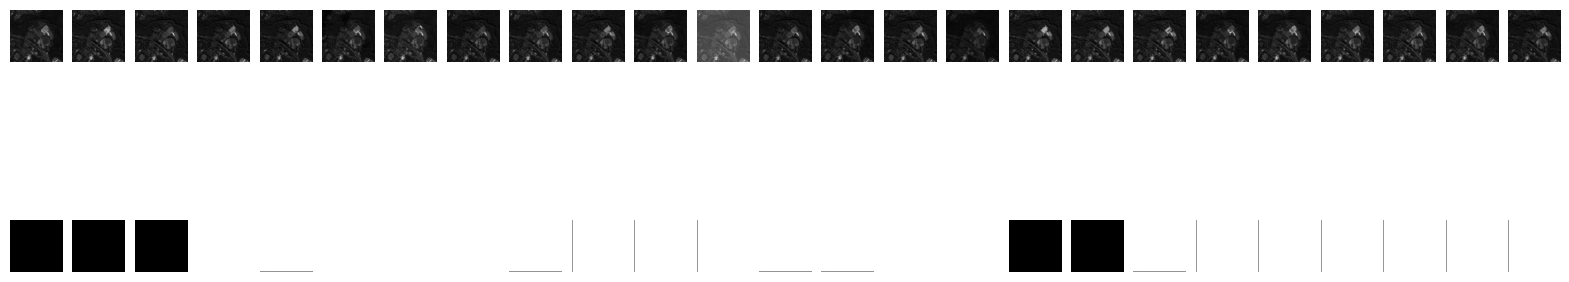

In [64]:
fig, ax = plt.subplots(2, T, figsize=(20,5))

if band == "GREEN":
    for i in range(T):
        ax[0,i].imshow(X_GREEN_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_GREEN_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')
else:
    for i in range(T):
        ax[0,i].imshow(X_RED_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_RED_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')

<a id="save"></a>
# 4.0 Save dataset

In [65]:
if not os.path.isdir(dataset_output_dir):
    os.mkdir(dataset_output_dir)

In [66]:
# save training
np.save(os.path.join(dataset_output_dir, 'X_RED_train.npy'), X_RED_train)
np.save(os.path.join(dataset_output_dir, 'X_GREEN_train.npy'), X_GREEN_train)
np.save(os.path.join(dataset_output_dir, 'X_BLUE_train.npy'), X_BLUE_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train.npy'), y_RED_train)
np.save(os.path.join(dataset_output_dir, 'y_GREEN_train.npy'), y_GREEN_train)
np.save(os.path.join(dataset_output_dir, 'y_BLUE_train.npy'), y_BLUE_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train_masks.npy'), y_RED_train_masks)
np.save(os.path.join(dataset_output_dir, 'y_GREEN_train_masks.npy'), y_GREEN_train_masks)
np.save(os.path.join(dataset_output_dir, 'y_BLUE_train_masks.npy'), y_BLUE_train_masks)

In [67]:
# save validation
if not train_full:
    np.save(os.path.join(dataset_output_dir, 'X_RED_val.npy'), X_RED_val)
    np.save(os.path.join(dataset_output_dir, 'X_GREEN_val.npy'), X_GREEN_val)
    np.save(os.path.join(dataset_output_dir, 'X_BLUE_val.npy'), X_BLUE_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val.npy'), y_RED_val)
    np.save(os.path.join(dataset_output_dir, 'y_GREEN_val.npy'), y_GREEN_val)
    np.save(os.path.join(dataset_output_dir, 'y_BLUE_val.npy'), y_BLUE_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val_masks.npy'), y_RED_val_masks)
    np.save(os.path.join(dataset_output_dir, 'y_GREEN_val_masks.npy'), y_GREEN_val_masks)
    np.save(os.path.join(dataset_output_dir, 'y_BLUE_val_masks.npy'), y_BLUE_val_masks)

In [68]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_RED_test.npy'), X_RED_test)
np.save(os.path.join(dataset_output_dir, 'X_GREEN_test.npy'), X_GREEN_test)
np.save(os.path.join(dataset_output_dir, 'X_BLUE_test.npy'), X_BLUE_test)